## Задание 1


In [2]:
import numpy as np
from scipy.special import roots_legendre

In [2]:
def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    roots, weights = roots_legendre(2) 
    adjusted_roots = (b - a)/2 * roots + (a + b)/2
    adjusted_weigths = weights*(b-a)/2
    return *adjusted_roots, *adjusted_weigths
    raise NotImplementedError()

from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)


## Задание 2

$$ I=\int_0^1 \frac{e^xdx}{\sqrt{x(1-x)}}=\int_0^1\frac{e^x-1-x}{\sqrt{x(1-x)}}dx+\int_0^1\frac{1}{\sqrt{x(1-x)}}dx+\int_0^1\frac{x}{\sqrt{x(1-x)}}dx = \int_0^1\frac{e^x-1-x}{\sqrt{x(1-x)}}dx + \frac{3\pi}{2} \approx \int_0^{0.99}\frac{e^x-1-x}{\sqrt{x(1-x)}}dx + \int_{0.99}^1\frac{e-2}{\sqrt{(1-x)}}dx + \frac{3\pi}{2}$$

Первый интеграл посчитаем через формулу трапеции, второй аналитически:
$$ \int_{0.99}^1\frac{e-2}{\sqrt{(1-x)}}dx = 0.2(e-2) $$

In [17]:
def func(x):
    if x == 0:
        return 0
    else:
        return (np.exp(x)-x-1)/np.sqrt(x*(1-x))

In [25]:
integral = 3*np.pi/2+0.2*(np.exp(1)-2)
x = np.linspace(0,0.99,10000)
for i in range (0,9999):
    integral+=(x[i+1]-x[i])*(func(x[i])+func(x[i+1]))/2

print('Значение исходного интеграла:', integral)

Значение исходного интеграла: 5.50933309476023


Вольфрам даёт значение исходного интеграла $5.50843$

## Задание 4

$$ J = \int_{-0.5}^{0.5}\frac{dx}{\sqrt{|x|(1-x)}} = \int_{-0.5}^{0-\delta_1}\frac{dx}{\sqrt{|x|(1-x)}} + \int_{0-\delta_1}^{0+\delta_2}\frac{dx}{\sqrt{|x|(1-x)}} + \int_{0+\delta_2}^{0.5}\frac{dx}{\sqrt{|x|(1-x)}} $$

Хотим, чтобы интеграл посередине был по модулю меньше какого-то наперед заданного значения эпсилон (точность вычисления)

$$\int_{0-\delta_1}^{0+\delta_2}\frac{dx}{\sqrt{|x|(1-x)}}=\int_{0-\delta_1}^{0}\frac{dx}{\sqrt{|x|(1-x)}}+\int_{0}^{0+\delta_2}\frac{dx}{\sqrt{|x|(1-x)}} = \int_{0-\delta_1}^{0}\frac{dx}{\sqrt{x(x-1)}} + \int_{0}^{0+\delta_2}\frac{dx}{\sqrt{x(1-x)}} = \int_{0}^{0+\delta_1}\frac{dx}{\sqrt{x(1+x)}}+\int_{0}^{0+\delta_2}\frac{dx}{\sqrt{x(1-x)}}$$

$$ |\int_{0}^{0+\delta_1}\frac{dx}{\sqrt{x(1+x)}}+\int_{0}^{0+\delta_2}\frac{dx}{\sqrt{x(1-x)}}| \leq |\int_{0}^{0+\delta_1}\frac{dx}{\sqrt{x(1+x)}}|+|\int_{0}^{0+\delta_2}\frac{dx}{\sqrt{x(1-x)}}|\leq \int_{0}^{0+\delta_1}\frac{dx}{\sqrt{x}}+\frac{1}{\sqrt{1-\delta_2}}\int_{0}^{0+\delta_2}\frac{dx}{\sqrt{x}}=2\sqrt{\delta_1}+2\sqrt{\frac{\delta_2}{1-\delta_2}}

Выберем одинаковые дельта:
$$ \approx 4\sqrt{\delta}\leq\varepsilon$$

In [28]:
def find_delta(epsilon):
    return epsilon**2/16

find_delta(1e-2)

6.25e-06

## Задание 5

In [37]:
def f(x, k):
    return np.exp(-x)*np.sin(k*x)

In [40]:
x1 = np.linspace(0, np.pi, 10000)
def integrate(k):  ## Интеграл по методу Симпсона
    integral1 = 0
    for j in range(0, 9999):
        integral1+=(x1[j+1]-x1[j])*((f(x1[j],k)+f(x1[j+1],k))/6+f((x1[j]+x1[j+1])/2,k)*2/3)
    return integral1

In [ ]:
def true_value(k):  ## Аналитическое выражение
    return (k-(np.exp(-np.pi)*(k*np.cos(k*np.pi)+np.sin(k*np.pi))))/(1+k**2)

In [41]:
integrate(10)

0.09473129522141265

In [43]:
true_value(10)

0.09473129522140869

In [44]:
numbers = []
errors = []
for k in range(0,1000):
    numbers.append(k)
    errors.append(integrate(k)-true_value(k))

In [45]:
import matplotlib.pyplot as plt

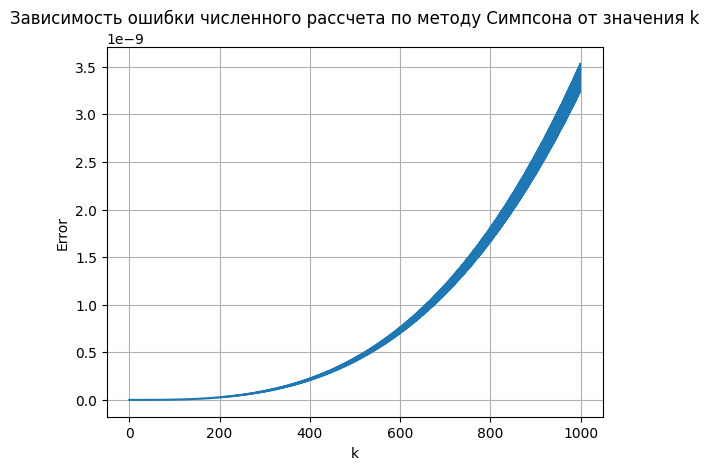

In [46]:
plt.plot(numbers, errors)
plt.title('Зависимость ошибки численного рассчета по методу Симпсона от значения k')
plt.xlabel('k')
plt.ylabel('Error')
plt.grid(True)
plt.show()